In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score  # cross_validation을 model_selection으로 변경
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

<ipython-input-2-b8b59c99affc>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [13]:
df = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
test = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Seaborn 라이브러리의 'titanic'데이터셋을 로드(seaborn.load_dataset())한다.
# 로드한 데이터프레임을  df에 대입한다.

#df = sns.load_dataset('titanic')

### Exploration

In [15]:
# SibSp: number of siblings and spouses traveling with
# Parch: number of parents and children traveling with
# The embarkation : It has three possible values S,C,Q
df['Age'].fillna(df['Age'].median(), inplace=True)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Women and children first !')

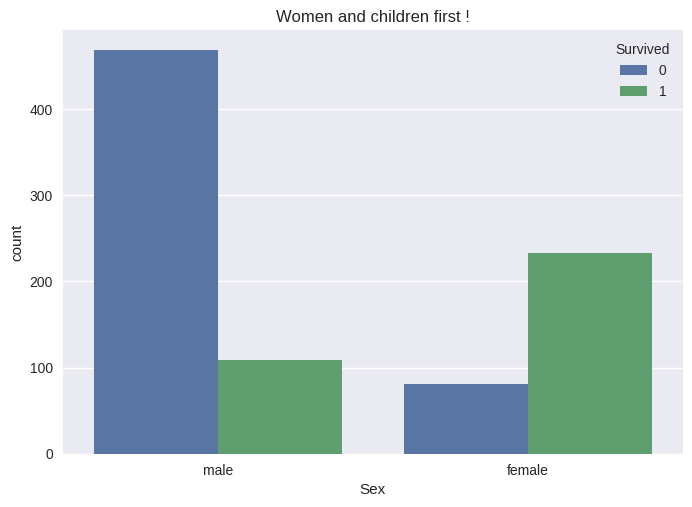

In [16]:
sns.countplot(x= 'Sex', hue='Survived', data=df)
plt.title("Women and children first !")

Text(0.5, 1.0, 'Women and children first !')

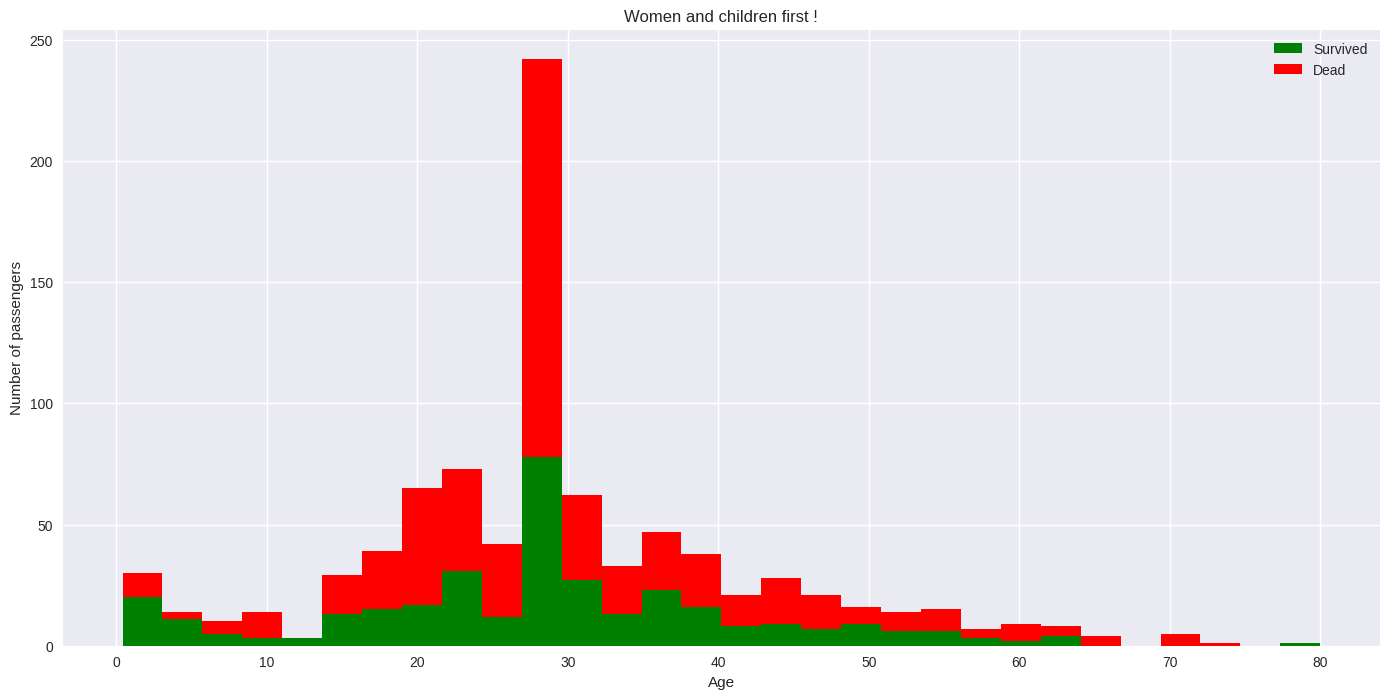

In [17]:
figure = plt.figure(figsize=(17,8))
plt.hist([df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.title("Women and children first !")

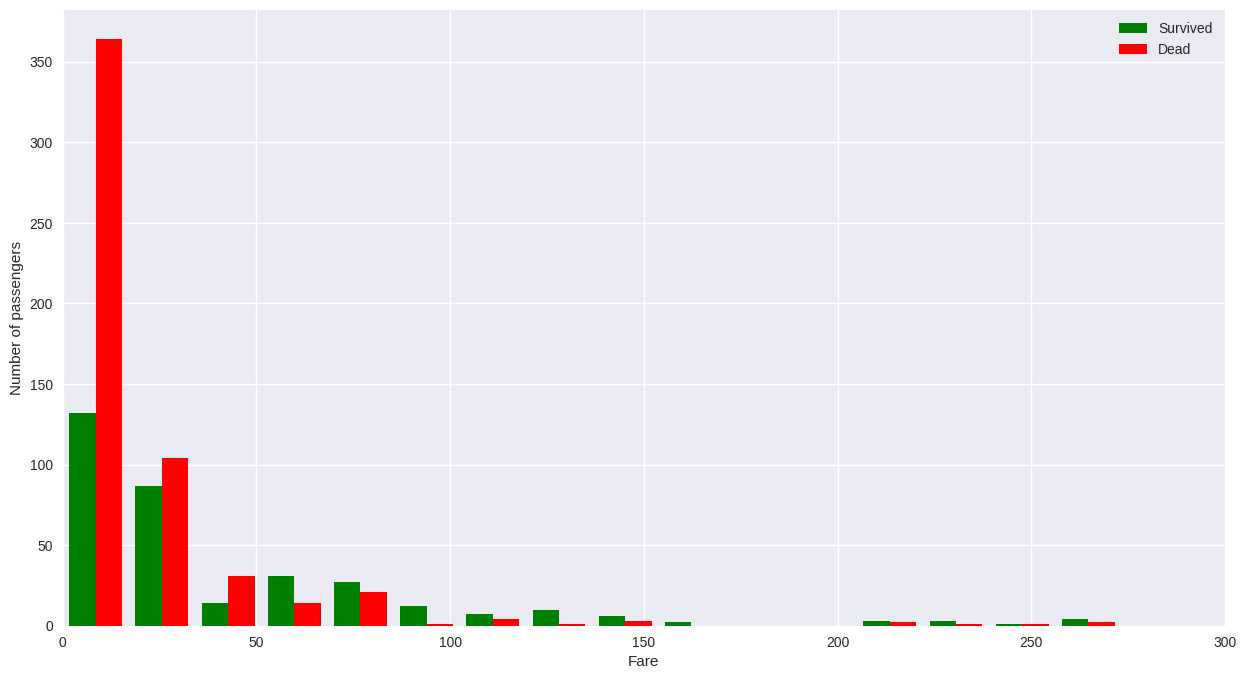

In [18]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Survived']==1]['Fare'],
          df[df['Survived']==0]['Fare']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.xlim([0,300])
plt.ylabel('Number of passengers')
plt.legend()

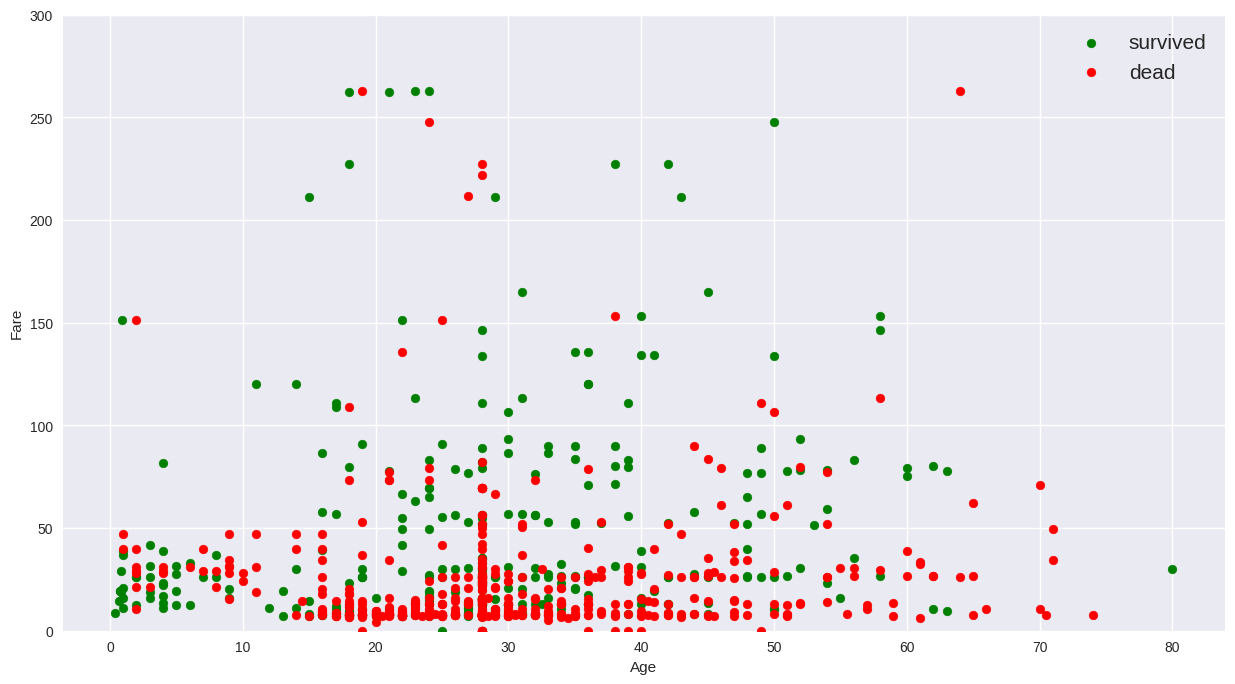

In [19]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(df[df['Survived']==1]['Age'],df[df['Survived']==1]['Fare'], c='green',s=40)
ax.scatter(df[df['Survived']==0]['Age'],df[df['Survived']==0]['Fare'], c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_ylim([0,300])
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

<Axes: xlabel='Embarked', ylabel='count'>

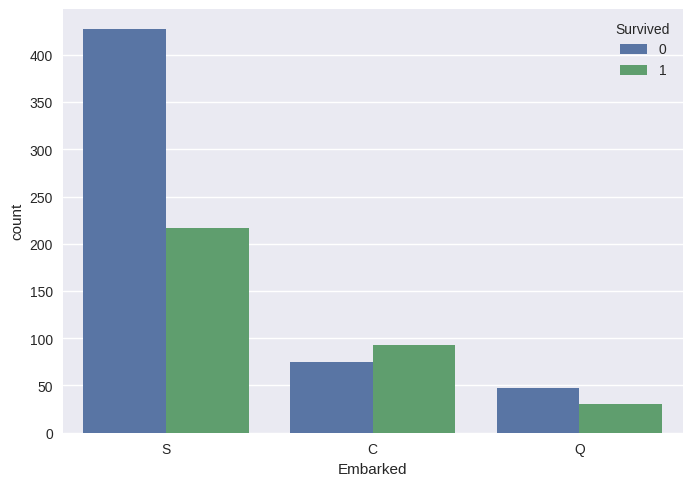

In [20]:
sns.countplot(x= 'Embarked', hue='Survived', data=df)

### Feature Engineering

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
train = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/train.csv')
test = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/test.csv')
targets = train.Survived
train.drop('Survived', axis=1, inplace=True)
combined = pd.concat([train, test])
combined.reset_index(inplace=True)
combined.drop('index', inplace=True, axis=1)

In [26]:
# Extracting title from the names
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Lady" :      "Royalty"}
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined.Title.apply(lambda x:Title_Dictionary.get(x,x))

In [28]:
combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [27]:
grouped_median_train = combined.iloc[:len(train)].groupby(['Sex','Pclass','Title']).median()
grouped_median_test = combined.iloc[len(train):].groupby(['Sex','Pclass','Title']).median()

TypeError: could not convert string to float: 'Bonnell, Miss. Elizabeth'

In [31]:
# 숫자형 데이터만을 선택합니다.
numeric_data_train = combined.iloc[:len(train)].select_dtypes(include=[np.number])
numeric_data_test = combined.iloc[len(train):].select_dtypes(include=[np.number])

# 이제 숫자형 데이터에 대해서만 그룹화 후 중간값을 계산합니다.
grouped_median_train = numeric_data_train.groupby([combined.iloc[:len(train)]['Sex'], combined.iloc[:len(train)]['Pclass'], combined.iloc[:len(train)]['Title']]).median()
grouped_median_test = numeric_data_test.groupby([combined.iloc[len(train):]['Sex'], combined.iloc[len(train):]['Pclass'], combined.iloc[len(train):]['Title']]).median()

In [29]:
def fillAges(row, grouped_median):
    if np.isnan(row['Age']):
        return grouped_median.loc[row['Sex'], row['Pclass'], row['Title']]['Age']
    else:
        return row['Age']

In [32]:
# Fills in the missing age in combined based on these different attributes.
combined.iloc[:len(train)]['Age'] = combined.iloc[:len(train)].apply(lambda r : fillAges(r, grouped_median_train), axis=1)
combined.iloc[len(train):]['Age'] = combined.iloc[len(train):].apply(lambda r : fillAges(r, grouped_median_test), axis=1)

<ipython-input-32-b3d6f2db9ca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.iloc[:len(train)]['Age'] = combined.iloc[:len(train)].apply(lambda r : fillAges(r, grouped_median_train), axis=1)
<ipython-input-32-b3d6f2db9ca9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.iloc[len(train):]['Age'] = combined.iloc[len(train):].apply(lambda r : fillAges(r, grouped_median_test), axis=1)


In [33]:
combined.drop('Name', axis=1, inplace=True)
le_title = LabelEncoder()
combined['Title'] = le_title.fit_transform(combined['Title'])

In [34]:
# Fills the fare by the mean
combined.Fare.fillna(combined.Fare.mean(), inplace=True)

# Fills the embarked by the most common
combined.Embarked.fillna('S', inplace=True)

le_embarked = LabelEncoder()
combined['Embarked'] = le_embarked.fit_transform(combined['Embarked'])

# Replacing missing cabins with U (for Uknown)
combined.Cabin.fillna('U', inplace=True)
# mapping each Cabin value with the cabin letter
combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])

le_cabin = LabelEncoder()
combined['Cabin'] = le_cabin.fit_transform(combined['Cabin'])

# Encoder for Sex
le_sex = LabelEncoder()
combined['Sex'] = le_sex.fit_transform(combined['Sex'])

In [35]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = list(map(lambda t : t.strip(), ticket))
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [36]:
combined['Ticket'] = combined['Ticket'].apply(cleanTicket)
le_ticket = LabelEncoder()
combined['Ticket'] = le_ticket.fit_transform(combined['Ticket'])

In [37]:
# Variables around family feature
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

combined.drop('PassengerId', inplace=True, axis=1)

In [43]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Sex          1309 non-null   int64  
 2   Age          1046 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Ticket       1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Cabin        1309 non-null   int64  
 8   Embarked     1309 non-null   int64  
 9   Title        1309 non-null   int64  
 10  FamilySize   1309 non-null   int64  
 11  Singleton    1309 non-null   int64  
 12  SmallFamily  1309 non-null   int64  
 13  LargeFamily  1309 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 143.3 KB


In [49]:
combined = combined.dropna()

In [50]:
combined

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,1,22.0,1,0,2,7.2500,8,2,2,2,0,1,0
1,1,0,38.0,1,0,14,71.2833,2,0,3,2,0,1,0
2,3,0,26.0,0,0,31,7.9250,8,2,1,1,1,0,0
3,1,0,35.0,1,0,36,53.1000,2,2,3,2,0,1,0
4,3,1,35.0,0,0,36,8.0500,8,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,3.0,1,1,28,13.7750,8,2,1,3,0,1,0
1302,1,0,37.0,1,0,36,90.0000,2,1,3,2,0,1,0
1303,3,0,28.0,0,0,36,7.7750,8,2,1,1,1,0,0
1305,1,0,39.0,0,0,14,108.9000,2,0,5,1,1,0,0


In [56]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### Modeling

In [51]:
X_train = combined.head(len(train))
X_test = combined[len(train):]
y_train = df.Survived

In [52]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [53]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [54]:
# feat_imp = dict(zip(X_train.columns[np.argsort(clf.feature_importances_)[::-1]],
#     np.sort(clf.feature_importances_)[::-1]))
# new_cols = [k for k,v in feat_imp.items() if v > 0.02]
# train_reduced = X_train[new_cols]
# test_reduced = X_test[new_cols]

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
test_reduced = model.transform(X_test)
train_reduced.shape, X_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((891, 3), (891, 14))

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(y_train, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train_reduced, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else:
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50,
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    model = RandomForestClassifier(**parameters)
    model.fit(train_reduced, y_train)

In [59]:
compute_score(model, train_reduced, y_train, scoring='accuracy')

0.6094344360052728

In [62]:
output = model.predict(test_reduced).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/output.csv',index=False)

ValueError: Length of values (155) does not match length of index (418)

In [64]:
df_output

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [63]:
model.score(train_reduced, y_train)

0.6778900112233446

In [65]:
combined

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,1,22.0,1,0,2,7.2500,8,2,2,2,0,1,0
1,1,0,38.0,1,0,14,71.2833,2,0,3,2,0,1,0
2,3,0,26.0,0,0,31,7.9250,8,2,1,1,1,0,0
3,1,0,35.0,1,0,36,53.1000,2,2,3,2,0,1,0
4,3,1,35.0,0,0,36,8.0500,8,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,3.0,1,1,28,13.7750,8,2,1,3,0,1,0
1302,1,0,37.0,1,0,36,90.0000,2,1,3,2,0,1,0
1303,3,0,28.0,0,0,36,7.7750,8,2,1,1,1,0,0
1305,1,0,39.0,0,0,14,108.9000,2,0,5,1,1,0,0


In [66]:
train2 = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/train.csv')
test2 = pd.read_csv('/content/drive/MyDrive/2024_인공지능/팀플_타이타닉/test.csv')
combined2 = pd.concat([train, test])
combined2.reset_index(inplace=True)
combined2.drop('index', inplace=True, axis=1)

In [74]:
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [68]:
combined2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
combined2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [76]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
# Fills the fare by the mean
train2.Fare.fillna(train2.Fare.mean(), inplace=True)

# Fills the embarked by the most common
train2.Embarked.fillna('S', inplace=True)

le_embarked = LabelEncoder()
train2['Embarked'] = le_embarked.fit_transform(train2['Embarked'])

# Replacing missing cabins with U (for Uknown)
train2.Cabin.fillna('U', inplace=True)
# mapping each Cabin value with the cabin letter
train2['Cabin'] = train2['Cabin'].map(lambda c : c[0])

le_cabin = LabelEncoder()
train2['Cabin'] = le_cabin.fit_transform(train2['Cabin'])

# Encoder for Sex
le_sex = LabelEncoder()
train2['Sex'] = le_sex.fit_transform(train2['Sex'])

In [78]:
train2['Ticket'] = train2['Ticket'].apply(cleanTicket)
le_ticket = LabelEncoder()
train2['Ticket'] = le_ticket.fit_transform(train2['Ticket'])

In [81]:
# Variables around family feature
train2['FamilySize'] = train2['Parch'] + train2['SibSp'] + 1
train2['Singleton'] = train2['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train2['SmallFamily'] = train2['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
train2['LargeFamily'] = train2['FamilySize'].map(lambda s: 1 if 5<=s else 0)

train2.drop('PassengerId', inplace=True, axis=1)

In [82]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int64  
 10  Embarked     891 non-null    int64  
 11  FamilySize   891 non-null    int64  
 12  Singleton    891 non-null    int64  
 13  SmallFamily  891 non-null    int64  
 14  LargeFamily  891 non-null    int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 104.5+ KB


In [83]:
train2_dropna = train2.dropna()
train2_dropna

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,7.2500,8,2,2,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,10,71.2833,2,0,2,0,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,26,7.9250,8,2,1,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,30,53.1000,2,2,2,0,1,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,30,8.0500,8,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,30,29.1250,8,1,6,0,0,1
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,30,13.0000,8,2,1,1,0,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30,30.0000,1,2,1,1,0,0
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30,30.0000,2,0,1,1,0,0


In [86]:
train2_drop = train2_dropna.drop(['Name'], axis=1)
train2_drop

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,3,1,22.0,1,0,1,7.2500,8,2,2,0,1,0
1,1,1,0,38.0,1,0,10,71.2833,2,0,2,0,1,0
2,1,3,0,26.0,0,0,26,7.9250,8,2,1,1,0,0
3,1,1,0,35.0,1,0,30,53.1000,2,2,2,0,1,0
4,0,3,1,35.0,0,0,30,8.0500,8,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,30,29.1250,8,1,6,0,0,1
886,0,2,1,27.0,0,0,30,13.0000,8,2,1,1,0,0
887,1,1,0,19.0,0,0,30,30.0000,1,2,1,1,0,0
889,1,1,1,26.0,0,0,30,30.0000,2,0,1,1,0,0


In [90]:
# x feature, 예측 변수 y 정의
x_df=train2_drop.loc[:,['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','FamilySize','Singleton','SmallFamily','LargeFamily']]
y_df=train2_drop['Survived']

# train/test set으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

In [91]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# NaN 값을 평균으로 대체
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# XGBoost 모델 학습
clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
clf.fit(X_train_imputed, y_train)

# 중요 특징 선택
model = SelectFromModel(clf, prefit=True)
X_train_reduced = model.transform(X_train_imputed)
X_test_reduced = model.transform(X_test_imputed)

# 선택된 특징을 사용하여 모델 재학습
clf_reduced = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
clf_reduced.fit(X_train_reduced, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf_reduced.predict(X_test_reduced)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 선택된 특징의 개수와 원래 특징의 개수 출력
print(f'Reduced features shape: {X_train_reduced.shape}, Original features shape: {X_train.shape}')


Accuracy: 0.7972
Reduced features shape: (571, 3), Original features shape: (571, 13)


In [93]:
# 비선형 모델인 lightGBM 예측 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import joblib

# LGBM 모델 건설
lgbm=LGBMRegressor()
lgbm.fit(X_train, y_train)
pred= lgbm.predict(X_test)

#성능 확인
print("R2",r2_score(y_test,pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 13
[LightGBM] [Info] Start training from score 0.409807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [101]:
#@title 1. 그라디언트 부스팅 모델 건설

from sklearn.ensemble import GradientBoostingClassifier

# 그라디언트 부스팅 모델 초기화
gb_model = GradientBoostingClassifier()

# 모델 학습
gb_model.fit(X_train, y_train)

# 모델 평가
gb_accuracy = gb_model.score(X_test, y_test)
print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.8041958041958042


In [102]:
#@title 2. 특성 엔지니어링: 기존의 특성을 결합하거나 새로운 특성을 만들어 모델의 예측력을 향상시킬 수 있습니다. 예를 들어, 가족 규모나 승객의 나이와 성별을 결합한 특성을 추가할 수 있습니다.

# 가족 규모 특성 추가
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1

# 나이와 성별을 결합한 특성 추가
combined['AgeSex'] = combined['Age'] * combined['Sex']


In [103]:
#@title 3. 모델튜닝 : 모델의 하이퍼파라미터를 조정하여 최적의 성능을 얻을 수 있습니다. GridSearchCV나 RandomizedSearchCV와 같은 기법을 사용하여 하이퍼파라미터 공간을 탐색할 수 있습니다.

from sklearn.model_selection import GridSearchCV

# 그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01]}

# 그리드 서치 수행
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_model = grid_search.best_estimator_
best_accuracy = best_model.score(X_test, y_test)
print("Best Model Accuracy:", best_accuracy)


Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200}
Best Model Accuracy: 0.8111888111888111


In [105]:
#@title 4. 교차 검증: 모델의 성능을 정확하게 평가하기 위해 교차 검증을 사용하세요. 교차 검증을 통해 모델이 일반화되고 안정적인지 확인할 수 있습니다.

from sklearn.model_selection import cross_val_score

# 교차 검증 수행
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# 교차 검증 평균 정확도 출력
print("Cross-Validation Mean Accuracy:", cv_scores.mean())


Cross-Validation Mean Accuracy: 0.8231273836765828


In [107]:
#@title 5. 불균형 클래스 처리: 타이타닉 데이터셋은 생존자와 비생존자의 클래스 불균형이 있을 수 있습니다. 따라서 적절한 샘플링 전략을 사용하거나 클래스 가중치를 조정하여 불균형을 처리할 수 있습니다.

from sklearn.utils import class_weight

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)


# 그라디언트 부스팅 모델 학습 시 클래스 가중치 설정
gb_model_weighted = GradientBoostingClassifier(class_weight=dict(enumerate(class_weights)))

# 모델 학습
gb_model_weighted.fit(X_train, y_train)


TypeError: compute_class_weight() takes 1 positional argument but 3 were given

In [108]:
from sklearn.ensemble import VotingClassifier

# 다른 모델 초기화 (예: 랜덤 포레스트)
rf_model = RandomForestClassifier()

# 앙상블 모델 초기화
voting_model = VotingClassifier(estimators=[('gb', gb_model), ('rf', rf_model)])

# 앙상블 모델 학습
voting_model.fit(X_train, y_train)

# 앙상블 모델 평가
voting_accuracy = voting_model.score(X_test, y_test)
print("Voting Model Accuracy:", voting_accuracy)


Voting Model Accuracy: 0.7972027972027972
